<a href="https://colab.research.google.com/github/Hoperablack/Student_Performance/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [9]:
file_path = '/content/drive/MyDrive/DataSet/StudentPerformanceFactors.csv'
student_pd = pd.read_csv(file_path)

In [10]:
student_pd.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [14]:
label_encoders = {}
for col in student_pd.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    student_pd[col] = label_encoders[col].fit_transform(student_pd[col])

In [15]:
correlation_matrix = student_pd.corr()

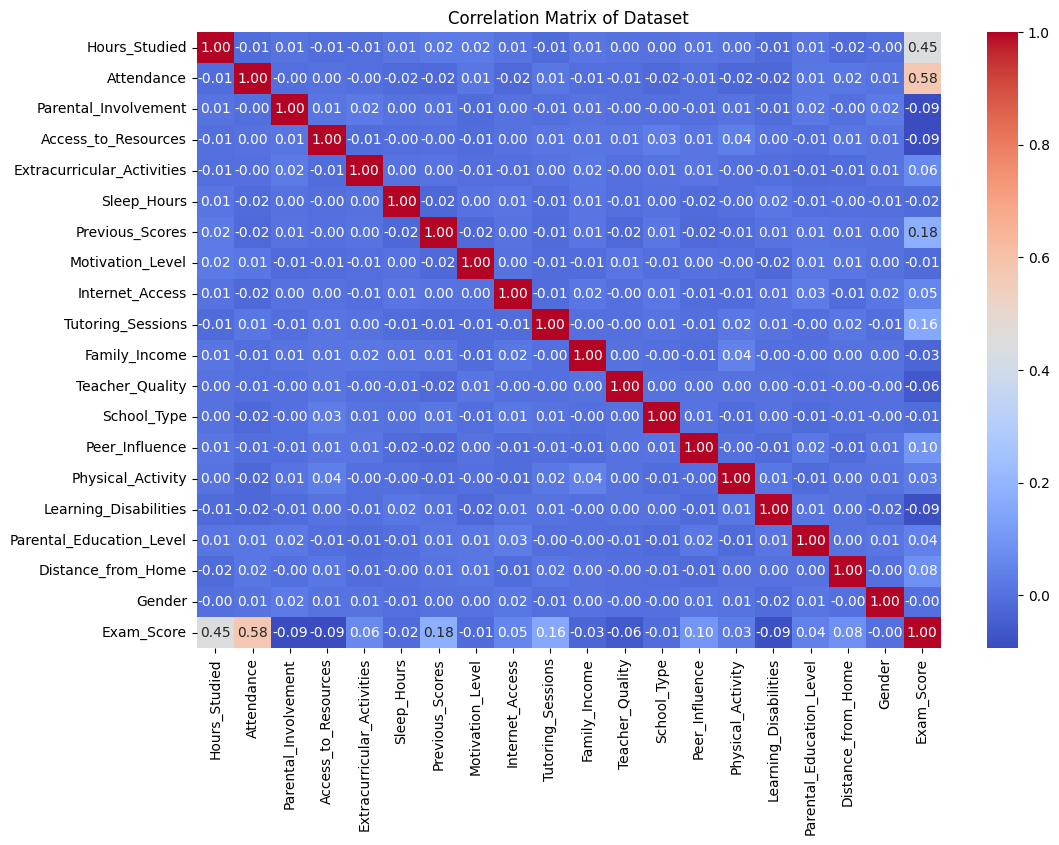

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Dataset")
plt.show()

In [17]:
student_pd['Score_Change'] = student_pd['Exam_Score'] - student_pd['Previous_Scores']

In [18]:
mean_change = student_pd['Score_Change'].mean()
median_change = student_pd['Score_Change'].median()

In [19]:
mean_change

-7.834872105342818

In [20]:
median_change

-8.0

In [24]:
improved_count = (student_pd['Score_Change'] > 0).sum()
declined_count = (student_pd['Score_Change'] < 0).sum()
no_change_count = (student_pd['Score_Change'] == 0).sum()

In [25]:
improved_count

2140

In [26]:
declined_count

4332

In [27]:
no_change_count

135

###The average, median, and standard deviation of key perfomances indicator

In [28]:
key_performances = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Exam_Score']
summary_statistics = student_pd[key_performances].agg(['mean', 'median', 'std'])


In [29]:
summary_statistics

,Hours_Studied,Attendance,Sleep_Hours,Exam_Score
mean,19.975329,79.977448,7.02906,67.235659
median,20.000000,80.000000,7.00000,67.000000
std,5.990594,11.547475,1.46812,3.890456


In [34]:
student_pd['Gender'] = student_pd['Gender'].replace({0: 'Male', 1: 'Female'})


###Avg exams score between male and female

In [35]:
avg_score_gender = student_pd.groupby('Gender')['Exam_Score'].mean()
avg_score_gender

,Exam_Score
Gender,
Female,67.228894
Male,67.244898


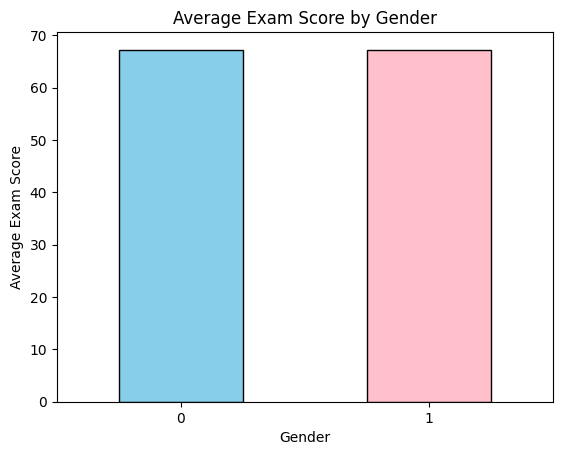

In [31]:
avg_score_gender.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black')
plt.title('Average Exam Score by Gender')
plt.ylabel('Average Exam Score')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

###Do students participating in Extracurricular Activities have higher score?

In [36]:
avg_score_extraactivites = student_pd.groupby('Extracurricular_Activities')['Exam_Score'].mean()
avg_score_extraactivites

,Exam_Score
Extracurricular_Activities,
0,66.931435
1,67.441849
